# Data Preparation

In [1]:
# import libraries
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np

# historical data for Big 7 stocks
tickers = ["AAPL", "MSFT", "GOOGL", "META", "AMZN", "NVDA", "NFLX", "TSLA"]
start = '2017-12-31'
end = '2022-12-31'
today = dt.datetime.today()
adj_price_df = pd.DataFrame()
ohlcv_data = {}

In [2]:
for ticker in tickers:
    adj_price_df[ticker] = yf.download(ticker, start, end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
adj_price_df

,AAPL,MSFT,GOOGL,META,AMZN,NVDA,NFLX,TSLA
Date,,,,,,,,
2018-01-02,40.722874,80.391823,53.660500,181.419998,59.450500,49.317123,201.070007,21.368668
2018-01-03,40.715786,80.765976,54.576000,184.669998,60.209999,52.562881,205.050003,21.150000
2018-01-04,40.904892,81.476837,54.787998,184.330002,60.479500,52.839943,205.630005,20.974667
2018-01-05,41.370625,82.487000,55.514500,186.850006,61.457001,53.287724,209.990005,21.105333
2018-01-08,41.216969,82.571152,55.710499,188.279999,62.343498,54.920509,212.050003,22.427334
...,...,...,...,...,...,...,...,...
2022-12-23,131.127060,237.112076,89.230003,118.040001,85.250000,152.005920,294.959991,123.150002
2022-12-27,129.307236,235.354095,87.389999,116.879997,83.040001,141.159805,284.170013,109.099998
2022-12-28,125.339409,232.940567,86.019997,115.620003,81.820000,140.310074,276.880005,112.709999


# Data Exploration

In [4]:
daily_return_df = adj_price_df.pct_change()

array([[<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>]], dtype=object)

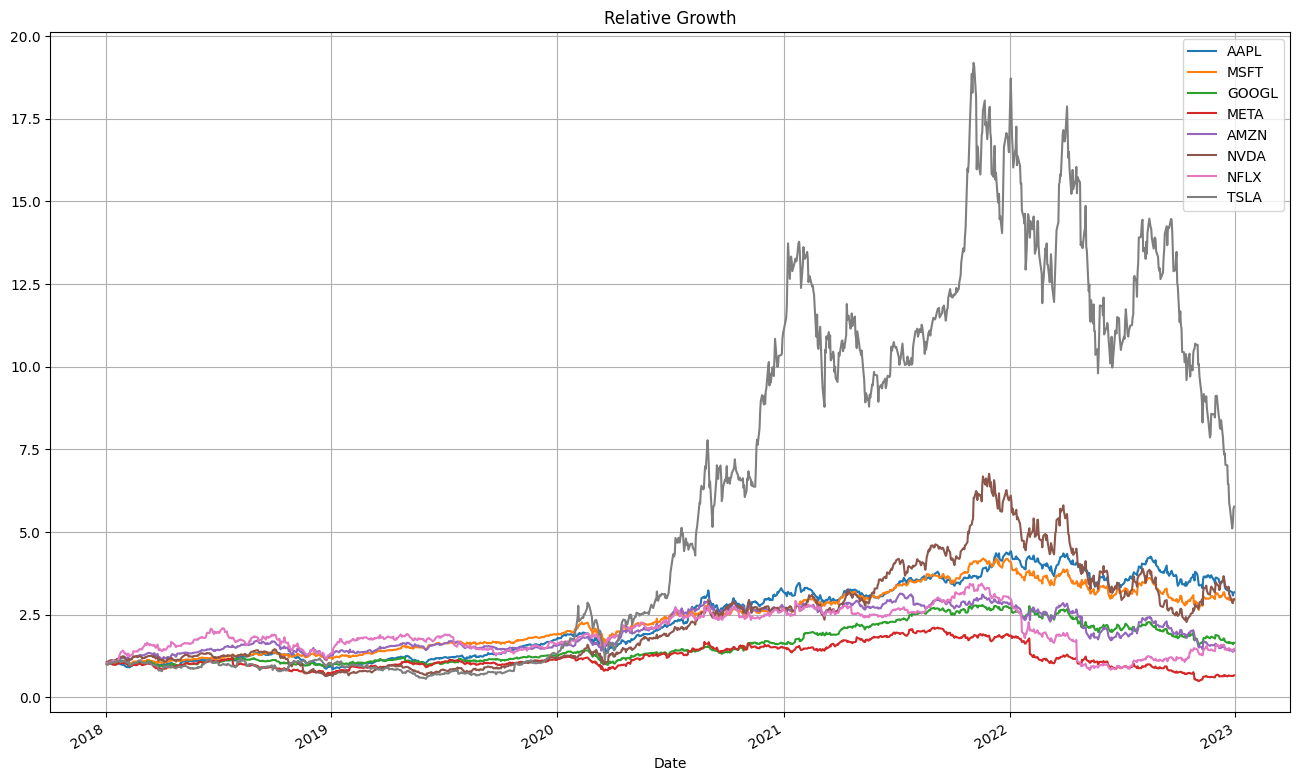

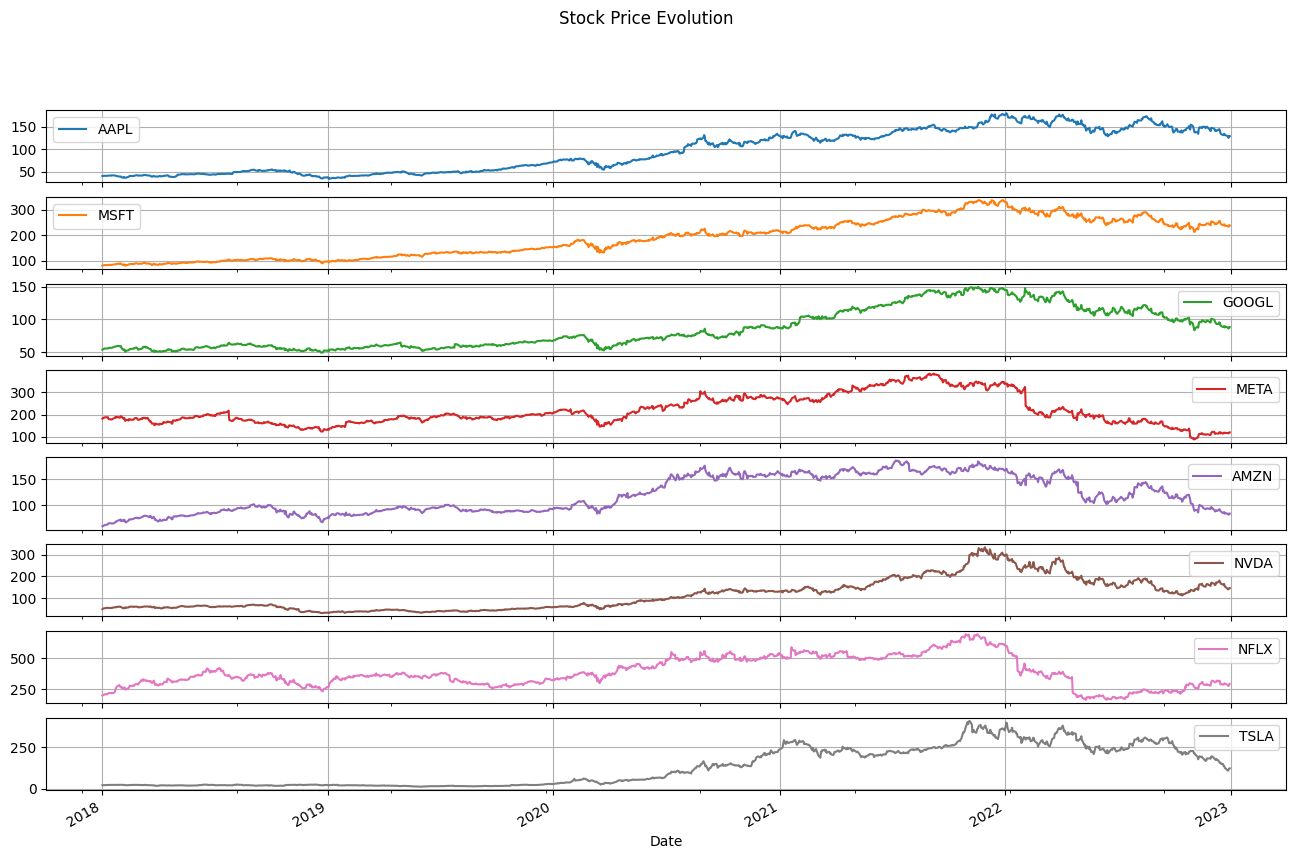

In [5]:
(1 + daily_return_df).cumprod().plot(figsize=(16, 10), title="Relative Growth", grid=True)
adj_price_df.plot(figsize=(16, 10), subplots=True, layout=(8, 1), title="Stock Price Evolution", grid =True) # Subplots of the stocks

In [6]:
daily_return_df.corr()

,AAPL,MSFT,GOOGL,META,AMZN,NVDA,NFLX,TSLA
AAPL,1.000000,0.772959,0.700822,0.584575,0.652026,0.665125,0.482989,0.466155
MSFT,0.772959,1.000000,0.808735,0.622377,0.715261,0.719511,0.533182,0.461370
GOOGL,0.700822,0.808735,1.000000,0.675031,0.682788,0.672557,0.518602,0.411227
META,0.584575,0.622377,0.675031,1.000000,0.610645,0.567401,0.525794,0.339746
AMZN,0.652026,0.715261,0.682788,0.610645,1.000000,0.646492,0.613882,0.434532
NVDA,0.665125,0.719511,0.672557,0.567401,0.646492,1.000000,0.519985,0.479659
NFLX,0.482989,0.533182,0.518602,0.525794,0.613882,0.519985,1.000000,0.381368
TSLA,0.466155,0.461370,0.411227,0.339746,0.434532,0.479659,0.381368,1.000000


# SMA Strategy

In [7]:
sma_df = pd.DataFrame()

In [8]:
for ticker in tickers:
    sma_df[ticker] = adj_price_df[ticker]
    sma_df[ticker + "_sma20"] = adj_price_df[ticker].rolling(window=20).mean()
    sma_df[ticker + "_sma50"] = adj_price_df[ticker].rolling(window=50).mean()
    sma_df[ticker + "_sma200"] = adj_price_df[ticker].rolling(window=200).mean()

In [9]:
sma_df.dropna(inplace=True)
sma_df

,AAPL,AAPL_sma20,AAPL_sma50,AAPL_sma200,MSFT,MSFT_sma20,MSFT_sma50,MSFT_sma200,GOOGL,GOOGL_sma20,...,NVDA_sma50,NVDA_sma200,NFLX,NFLX_sma20,NFLX_sma50,NFLX_sma200,TSLA,TSLA_sma20,TSLA_sma50,TSLA_sma200
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-16,53.190125,53.323140,52.590075,45.187741,105.164894,106.378089,104.860394,93.975796,56.653999,58.331400,...,65.980037,61.193839,346.399994,359.338998,353.974798,327.55070,18.439333,18.822400,20.077240,20.861733
2018-10-17,52.960274,53.356900,52.660966,45.248660,104.890152,106.331192,104.902979,94.098288,56.379501,58.214700,...,65.911885,61.248443,364.700012,359.225999,354.232198,328.36885,18.118668,18.731600,19.933520,20.845483
2018-10-18,51.722404,53.308894,52.706431,45.303425,102.796326,106.091019,104.892173,94.208439,54.895500,57.980550,...,65.818955,61.282445,346.709991,358.293500,354.214199,329.07715,17.594000,18.616867,19.791613,20.827703
2018-10-19,52.510139,53.328646,52.759872,45.361182,102.947929,105.825739,104.881001,94.315795,55.258999,57.813200,...,65.684383,61.302223,332.670013,356.867500,353.880399,329.71235,17.333332,18.486533,19.668347,20.809497
2018-10-22,52.830982,53.326970,52.822700,45.418211,103.866920,105.586986,104.900857,94.422695,55.568501,57.642725,...,65.568246,61.322303,329.540009,354.864001,353.553799,330.31010,17.396667,18.357433,19.542293,20.790953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.299820,140.063426,143.446967,151.122855,237.112076,245.494886,238.714056,259.043897,89.230003,94.038001,...,151.068545,171.710133,294.959991,303.174500,288.902801,250.08970,123.150002,165.201000,187.790000,255.097317
2022-12-27,129.477600,139.356941,143.285240,151.003349,235.354095,245.256513,238.893677,258.839870,87.389999,93.605001,...,151.647713,171.312169,284.170013,303.324500,289.986201,249.80895,109.099998,161.510000,185.872200,254.317234
2022-12-28,125.504539,138.603655,142.963928,150.884348,232.940552,244.968478,238.847344,258.641672,86.019997,93.146500,...,152.077768,170.948413,276.880005,303.120500,290.621801,249.53830,112.709999,158.104000,183.739400,253.603501


In [10]:
for ticker in tickers:
    sma_df[ticker + '_position'] = np.where((sma_df[ticker + '_sma20'] > sma_df[ticker + '_sma50']) & (sma_df[ticker + '_sma50'] > sma_df[ticker + '_sma200']), 1, 0)
    sma_df[ticker + '_position'] = np.where((sma_df[ticker + '_sma20'] < sma_df[ticker + '_sma50']) & (sma_df[ticker + '_sma50'] < sma_df[ticker + '_sma200']), -1, sma_df[ticker + '_position'])

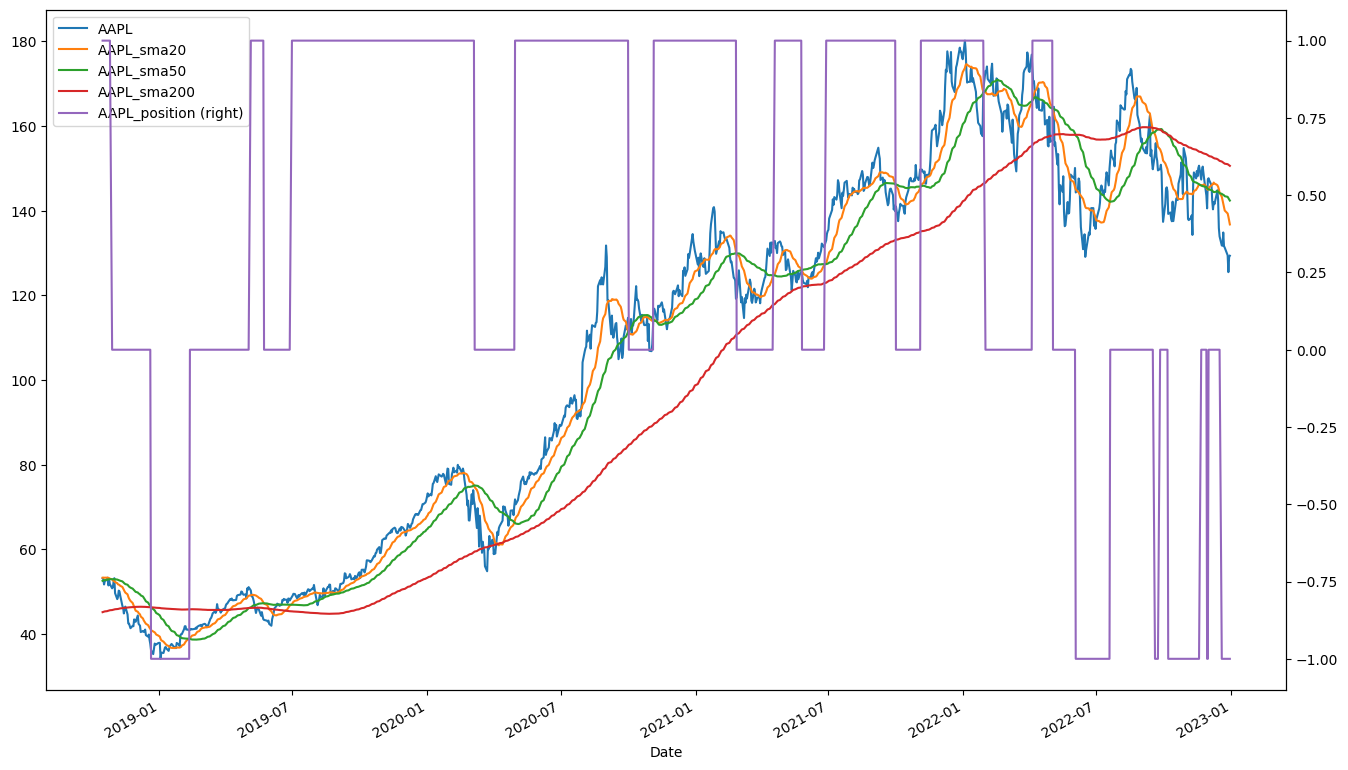

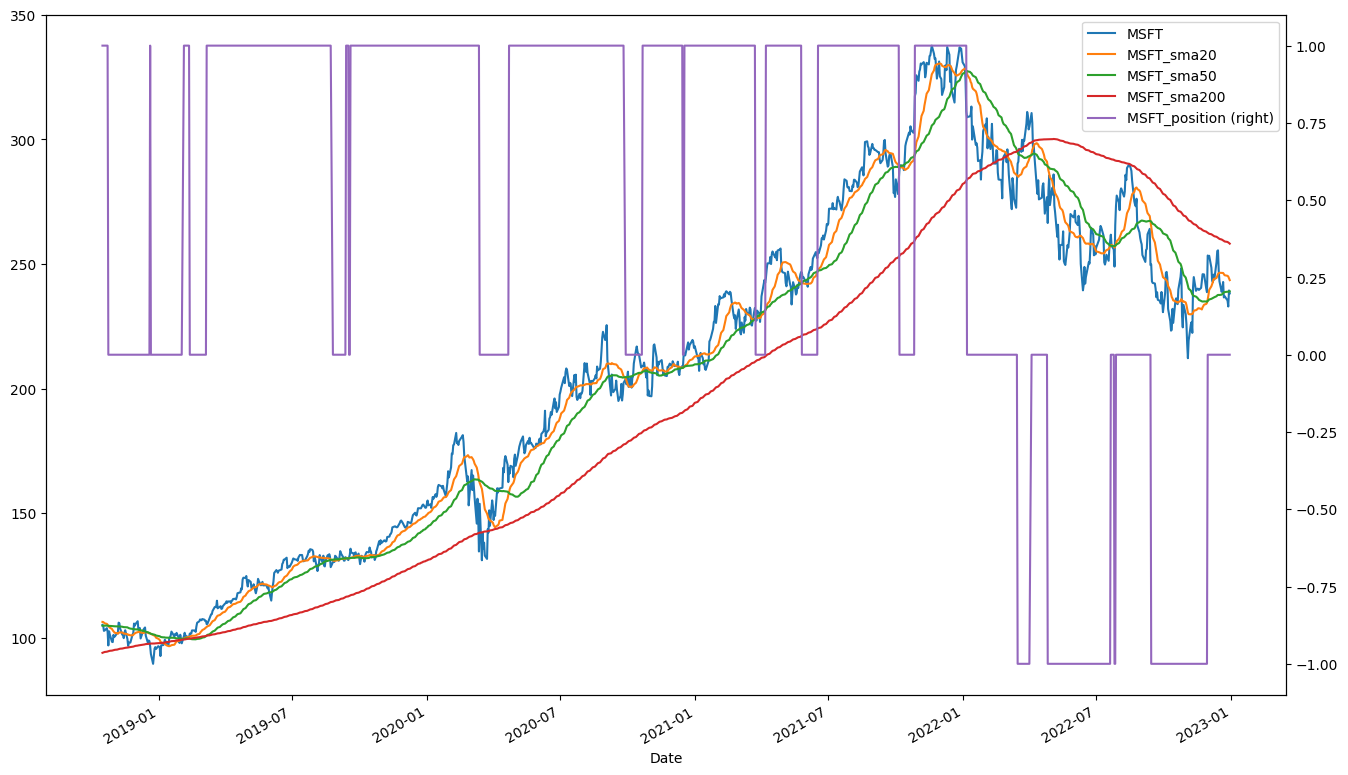

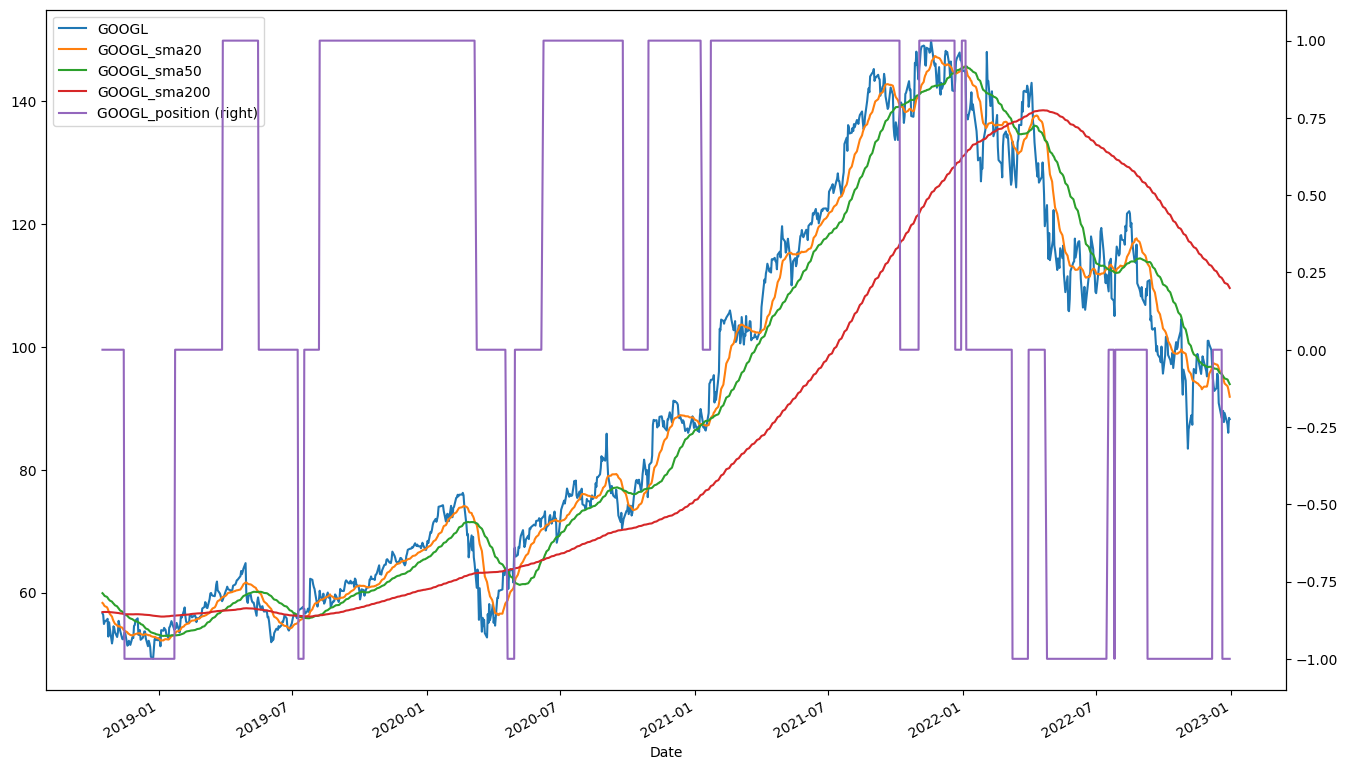

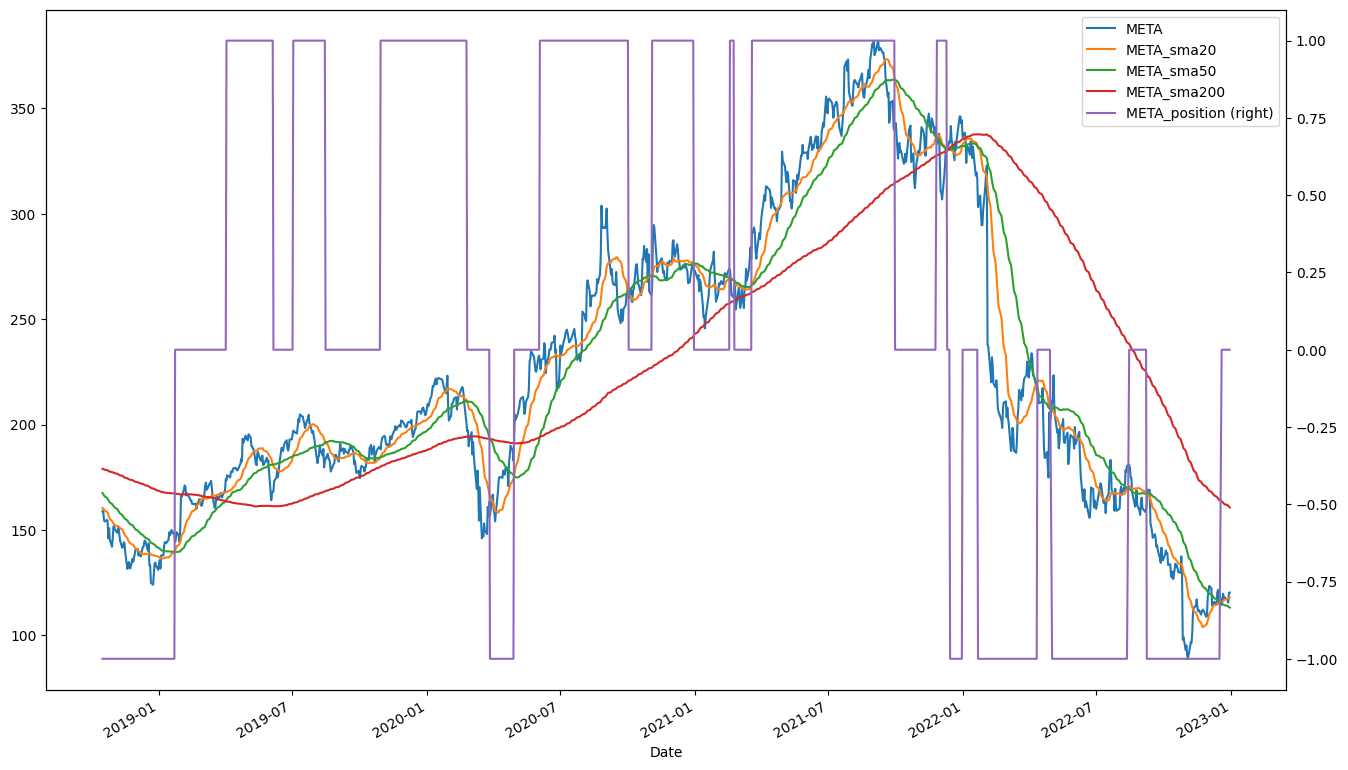

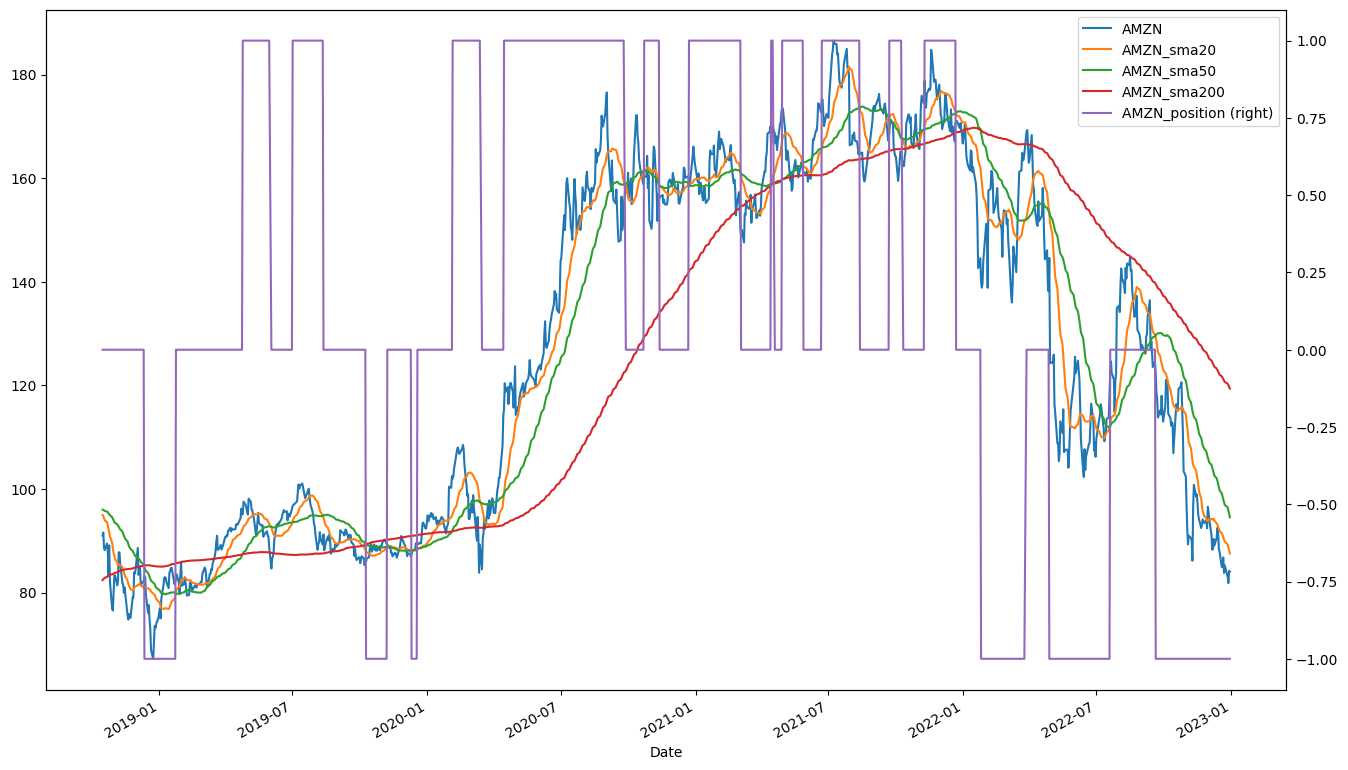

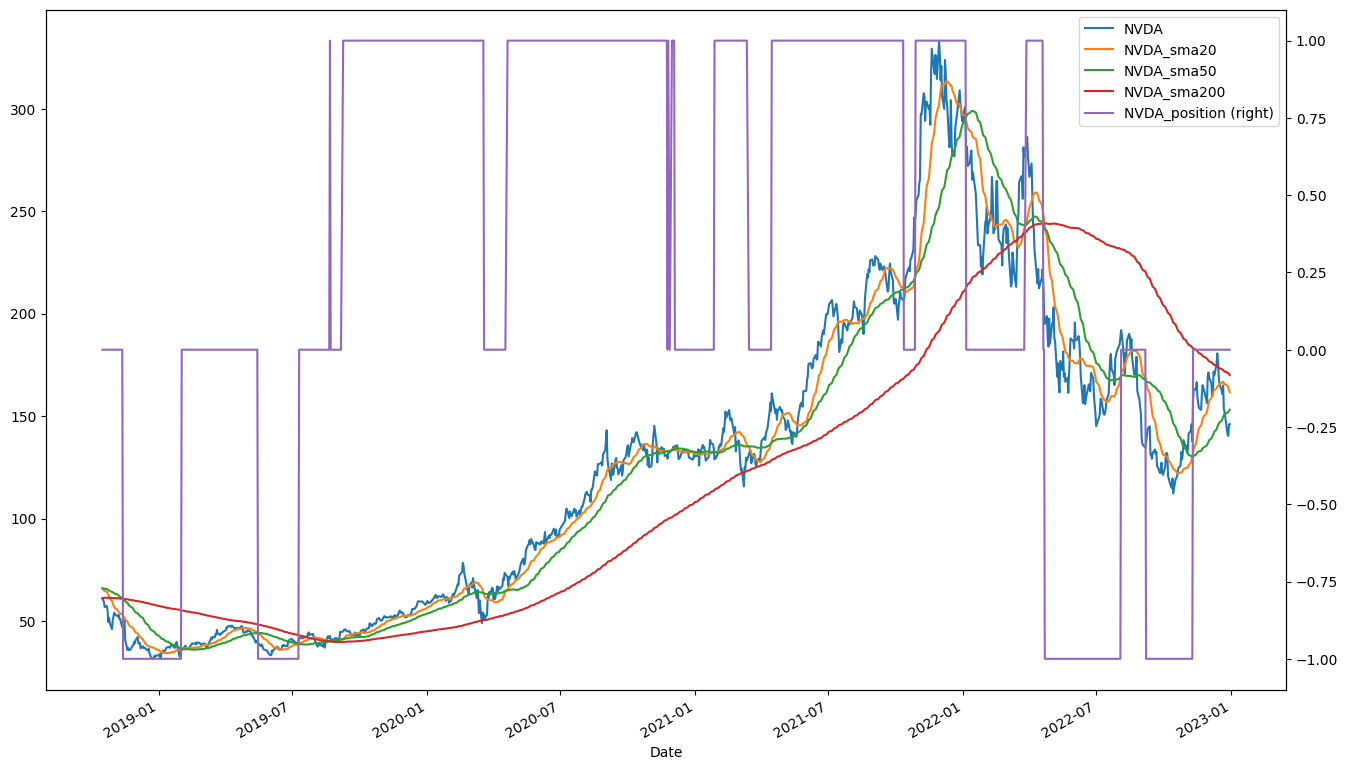

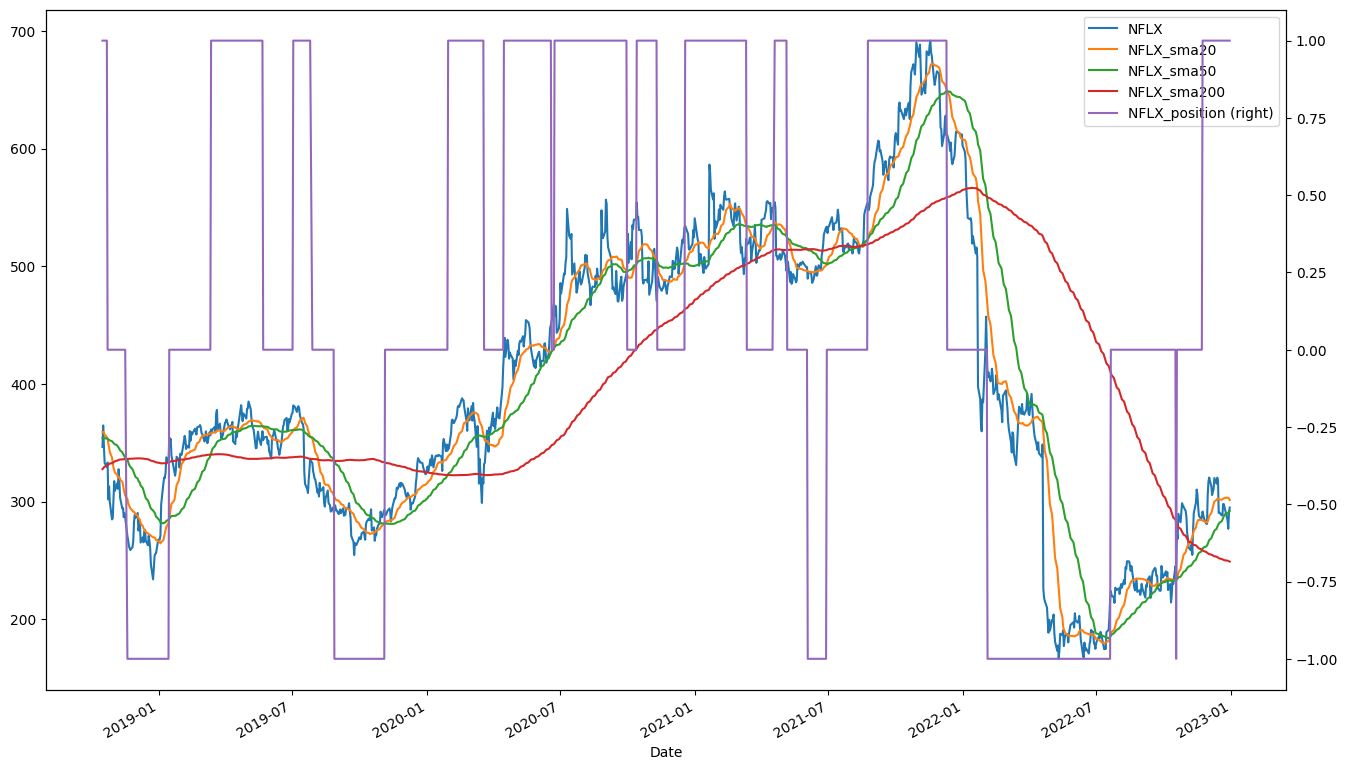

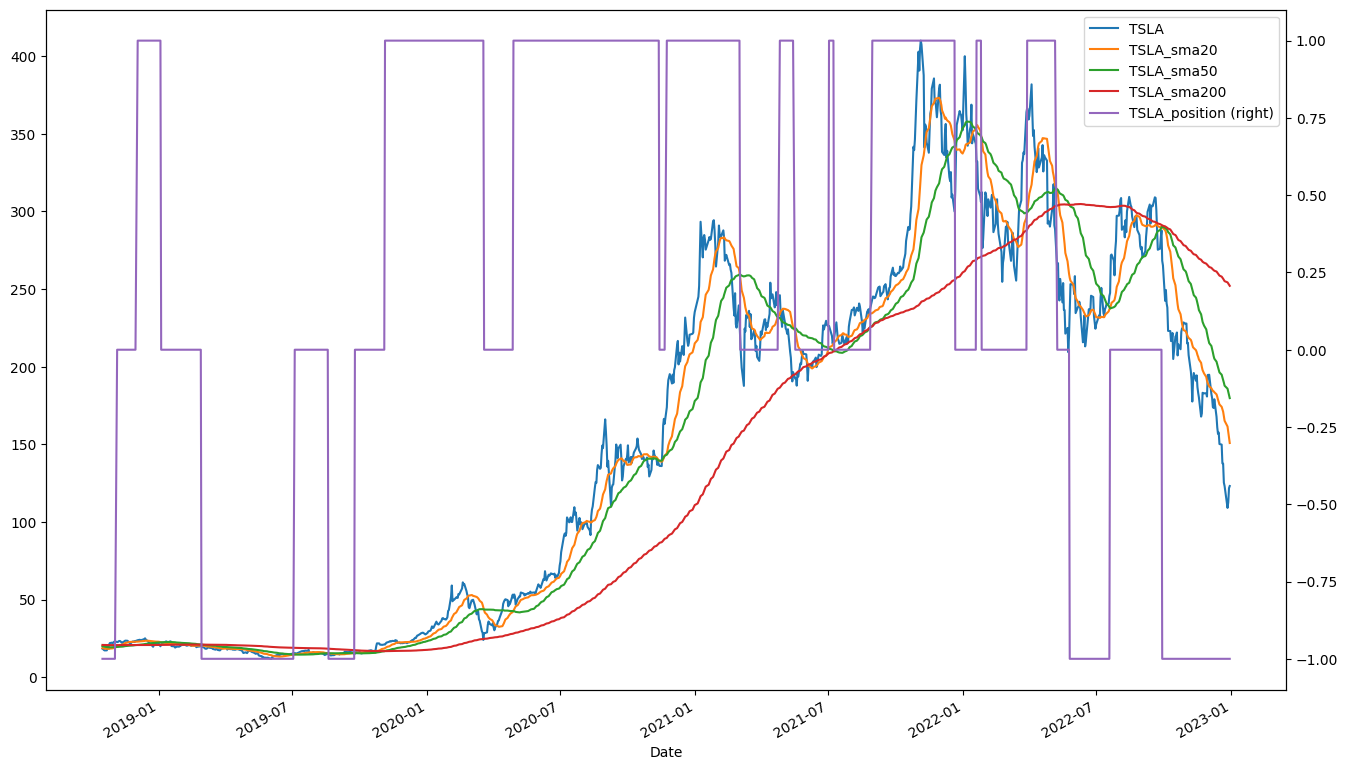

In [13]:
for ticker in tickers:
    ax = sma_df[[ticker, ticker + '_sma20', ticker + '_sma50', ticker + '_sma200', ticker + '_position']].plot(figsize=(16, 10), secondary_y=ticker+'_position')
    ax.get_legend();

# Performance Evaluation

In [14]:
for ticker in tickers:
    sma_df[ticker+'_ret'] = sma_df[ticker].pct_change()
    sma_df[ticker+'_ret'] = sma_df[ticker+'_ret'] * sma_df[ticker + '_position'].shift(1)

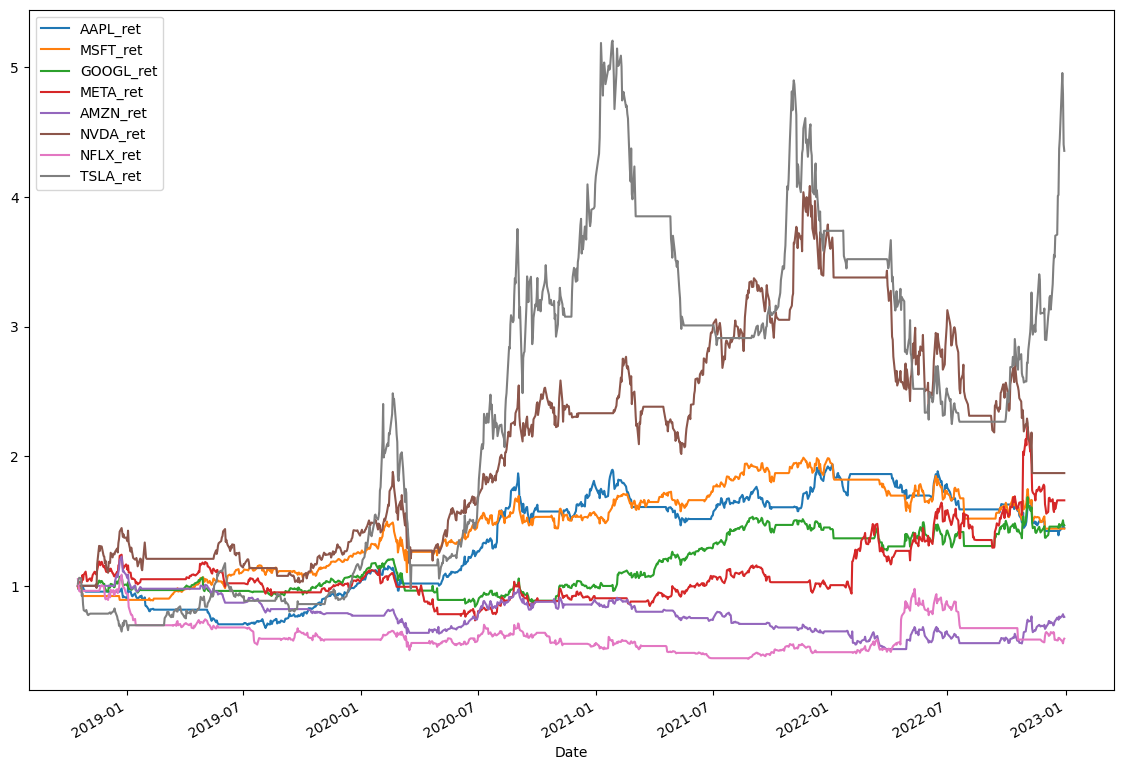

In [15]:
ax = (1 + sma_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

### SMA vs Buy & Hold Strategy

In [16]:
def bnh_ratio(DF, ticker):
    "calculate relative performance of the strategy versus buy & hold strategy"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    df['cum_return_bnh'] = (1 + df['return']).cumprod()
    return df.iloc[-1]['cum_return'] / df.iloc[-1]['cum_return_bnh']

In [17]:
for ticker in tickers:
    print("SMA performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(sma_df, ticker)))

SMA performance relative to B&H strategy on AAPL is 0.5943492795768112
SMA performance relative to B&H strategy on MSFT is 0.6365101908566494
SMA performance relative to B&H strategy on GOOGL is 0.9419310822446606
SMA performance relative to B&H strategy on META is 2.190333530817603
SMA performance relative to B&H strategy on AMZN is 0.8238017101571149
SMA performance relative to B&H strategy on NVDA is 0.7800115063343028
SMA performance relative to B&H strategy on NFLX is 0.6961762095577345
SMA performance relative to B&H strategy on TSLA is 0.6521796412599108


### Sharpe Ratio

In [18]:
def CAGR(DF, ticker):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    n = len(df) / 250
    CAGR = (df.iloc[-1]['cum_return']) ** (1 / n) - 1
    return CAGR

In [19]:
for ticker in tickers:
    print("CAGR of SMA strategy on {} = {}".format(ticker, CAGR(sma_df, ticker)))

CAGR of SMA strategy on AAPL = 0.0908188606716529
CAGR of SMA strategy on MSFT = 0.09010557540843855
CAGR of SMA strategy on GOOGL = 0.09457727440928632
CAGR of SMA strategy on META = 0.1269798320680764
CAGR of SMA strategy on AMZN = -0.06254484700474505
CAGR of SMA strategy on NVDA = 0.15913199894419083
CAGR of SMA strategy on NFLX = -0.11608207628310674
CAGR of SMA strategy on TSLA = 0.414965364709202


In [20]:
def volatility(DF, ticker):
    "function to calculate annualized Volatility of a trading strategy"
    df = DF.copy()
    vol = df[ticker+'_ret'].std() * np.sqrt(250)
    return vol

In [21]:
for ticker in tickers:
    print("Volatility for SMA strategy on {} = {}".format(ticker, volatility(sma_df, ticker)))

Volatility for SMA strategy on AAPL = 0.2553299856832086
Volatility for SMA strategy on MSFT = 0.25307580630371923
Volatility for SMA strategy on GOOGL = 0.2485880130406711
Volatility for SMA strategy on META = 0.37016756494656494
Volatility for SMA strategy on AMZN = 0.29977463768973184
Volatility for SMA strategy on NVDA = 0.4438061536763029
Volatility for SMA strategy on NFLX = 0.3961691603420744
Volatility for SMA strategy on TSLA = 0.5491475546671595


In [22]:
def sharpe(DF, ticker, rf):
    "function to calculate Sharpe Ratio of a trading strategy"
    df = DF.copy()
    return (CAGR(df, ticker) - rf) / volatility(df, ticker)

In [23]:
for ticker in tickers:
    print("Sharpe ratio for SMA strategy on {} = {}".format(ticker, sharpe(sma_df, ticker, 0.04)))

Sharpe ratio for SMA strategy on AAPL = 0.19903208992736388
Sharpe ratio for SMA strategy on MSFT = 0.19798642999602367
Sharpe ratio for SMA strategy on GOOGL = 0.21954909949884435
Sharpe ratio for SMA strategy on META = 0.23497421250463219
Sharpe ratio for SMA strategy on AMZN = -0.34207312464798795
Sharpe ratio for SMA strategy on NVDA = 0.26843250810596386
Sharpe ratio for SMA strategy on NFLX = -0.39397836052744956
Sharpe ratio for SMA strategy on TSLA = 0.6828135016215633


### Maximum Drawdown & Calmar Ratio

In [24]:
def max_dd(DF, ticker):
    "function to calculate Max Drawdown"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    df['cum_roll_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cum_return']
    return (df['drawdown'] / df['cum_roll_max']).max()
    
def calmar(DF, ticker):
    "function to calculate Calmar Ratio"
    df = DF.copy()
    return CAGR(df, ticker) / max_dd(df, ticker)

In [25]:
for ticker in tickers:
    print("Max Drawdown of SMA on {} = {}".format(ticker, max_dd(sma_df, ticker)))
    print("Calmar Ratio of SMA on {} = {}".format(ticker, calmar(sma_df, ticker)))

Max Drawdown of SMA on AAPL = 0.3268588224477155
Calmar Ratio of SMA on AAPL = 0.2778534781210635
Max Drawdown of SMA on MSFT = 0.27523929873958747
Calmar Ratio of SMA on MSFT = 0.3273717663904175
Max Drawdown of SMA on GOOGL = 0.3057838055349394
Calmar Ratio of SMA on GOOGL = 0.30929458230736734
Max Drawdown of SMA on META = 0.4085106983965952
Calmar Ratio of SMA on META = 0.31083600152082264
Max Drawdown of SMA on AMZN = 0.5822063314361003
Calmar Ratio of SMA on AMZN = -0.10742728759144321
Max Drawdown of SMA on NVDA = 0.5422172387001191
Calmar Ratio of SMA on NVDA = 0.2934838429808777
Max Drawdown of SMA on NFLX = 0.5977732630082474
Calmar Ratio of SMA on NFLX = -0.19419081358529275
Max Drawdown of SMA on TSLA = 0.6062653853820686
Calmar Ratio of SMA on TSLA = 0.6844615818659854


### Strategy Evaluation Summary

In [26]:
eval_df = pd.DataFrame()
eval_df.index = tickers

In [27]:
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(sma_df, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(sma_df, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(sma_df, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(sma_df, ticker)

In [28]:
eval_df

,bnh_ratio,sharpe_ratio,max_drawdown,calmar_ratio
AAPL,0.594349,0.199032,0.326859,0.277853
MSFT,0.636510,0.197986,0.275239,0.327372
GOOGL,0.941931,0.219549,0.305784,0.309295
META,2.190334,0.234974,0.408511,0.310836
AMZN,0.823802,-0.342073,0.582206,-0.107427
NVDA,0.780012,0.268433,0.542217,0.293484
NFLX,0.696176,-0.393978,0.597773,-0.194191
TSLA,0.652180,0.682814,0.606265,0.684462
